# 1. 시각화를 위한 라이브러리 설치

- using graphviz    
pip install -q pydot

- 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌.    
pip install pygraphviz   


- Graphviz 공식 사이트 : https://graphviz.org/download/   
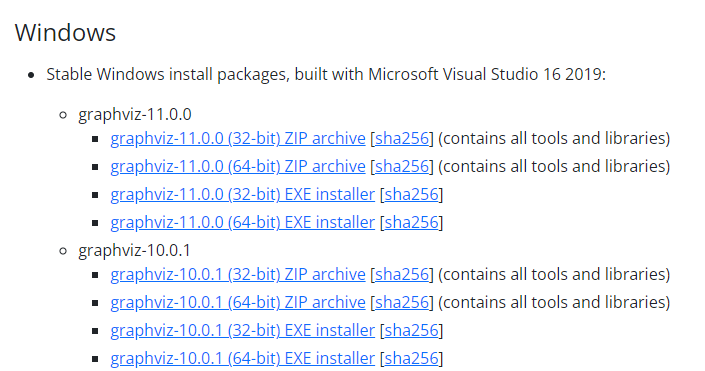

> 복붙만 해도 됨

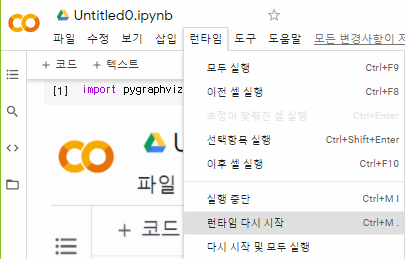

> 설치 완료 후 런타임 -> 런타임 다시 시작 실행

# 2. 결정 트리

## 2.1 데이터 추출
> iris 데이터를 읽어 들여 훈련데이터와 테스트 데이터를 7:3으로 분리하여 추출하시오

In [129]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

> 훈련 데이터와 검증 데이터를 받기 위해 train_test_split 함수를 이용한다. 데이터, 결과 데이터, 검증데이터 비율, 랜덤값 순으로 파라미터를 입력하면 되며 반환값은 훈련 데이터, 검증 데이터, 훈련 결과 데이터, 검증 결과 데이터 순으로 반환된다.

## 2.2 모델 학습

In [131]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## 2.3 시각화

### 2.3.1 그래프 생성

In [132]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', feature_names=iris.feature_names, class_names=iris.target_names, filled=True, impurity=True)

> export_graphviz 함수는 그래프로 시각화 하기 위한 출력 파일을 생성한다.
- decision_tree : 첫 인자로 학습이 완료된 모델이다.
- out_file : 그래프를 그릴 파일명을 지정한다.
- class_names : target_name을 지정한다ㅏ.
- feature_names : feature_name을 지정한다.
- impurity : True 시 불순율 표시(gini) 
- filled : 기본값은 False이며 True일 경우 노드의 클래스가 구분되도록 색을 칠한다.

### 2.3.2 파일 확인

>ls는 리눅스 명령어로 현재 경로의 디렉토리 및 파일을 보여준다.

### 2.3.3 그래프 출력

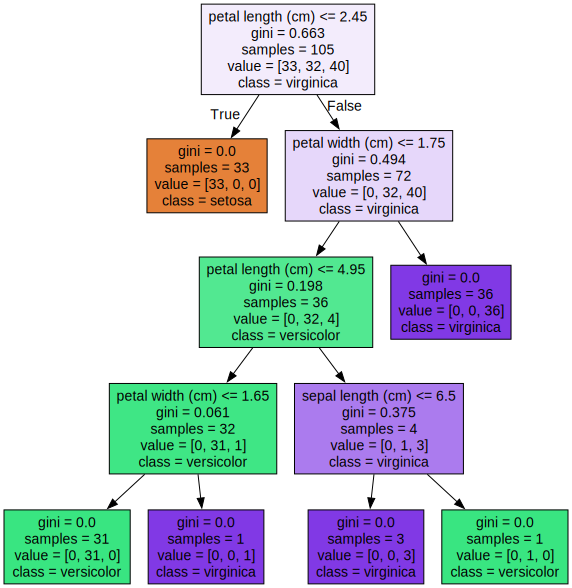

In [133]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

> 각 노드별로 다음과 같은 의미를 갖는다.
- 첫 번째 나타나는 조건식은 다음 내용을 분류하기 위한 기준이 된다.
- gini는 여러 종류의 데이터가 섞여 있는 비율을 의미하며 0이면 하나의 종류만 있는 것이다.
- samples는 데이터의 개수를 의미한다.
- value는 데이터의 종류별 건수를 의미하다.
- class는 최종 분류 결과이다.

> 루트 노드에서 꽃잎의 폭이 0.8이하이면 setosa이다. 

> 두 번째 노드에서 꽃잎의 폭이 1.65 초과이면 virginica이다. 

> 세 번째 노드에서 꽃잎의 길이가 5이하이면 versicolor이다. 5초과인 경우 samples의 수가 4이므로 더 분류를 안하는 것이 좋다. 더 나뉘게 되면 과적합되어 예측률이 떨어 질 수 있다. 

위의 내용을 기반으로 잘 분석하여 적당한 파라미터를 지정하고 성능 높은 모델을 생성하면 된다.

## 2.4 과적합 해소

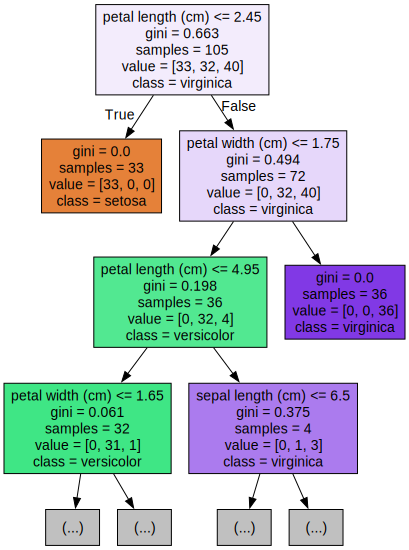

In [134]:
export_graphviz(dt_clf, out_file='tree.dot', feature_names=iris.feature_names, class_names=iris.target_names, filled=True, impurity=True, max_depth=3)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 2.5 feature 중요도

In [135]:
dt_clf.feature_importances_

array([0.02153993, 0.        , 0.54217667, 0.43628339])

In [136]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [137]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(name, round(value, 2))

sepal length (cm) 0.02
sepal width (cm) 0.0
petal length (cm) 0.54
petal width (cm) 0.44


### 2.5.1 feature 중요도 확인

> feature_importances_는 feature의 중요도를 뜻하는 것으로 수치가 클 수록 중요한 feature이다. 중요도가 높은 feature를 우선적으로 루트에서 분류하고 점차 낮은 feature로 분류를 마무리하게 된다.

### 2.5.2 시각화

<Axes: >

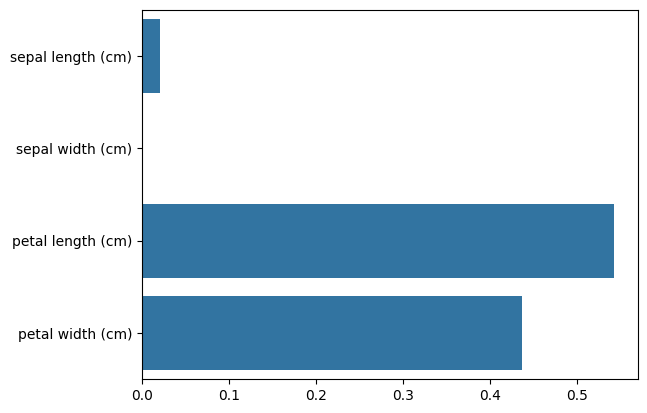

In [138]:
import seaborn as sns

sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)